In [2]:
import pandas as pd


data = pd.read_csv('netflix_titles.csv')


print(data.head())


print(data.info())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
# Check for missing values
print(data.isnull().sum())

# Drop rows where 'title' is missing, as it’s essential for our analysis
data.dropna(subset=['title'], inplace=True)

# Fill missing values in 'country' and 'rating' with a placeholder (like "Unknown")
data['country'].fillna("Unknown", inplace=True)
data['rating'].fillna("Unknown", inplace=True)

# Confirm that missing values are handled
print(data.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64
show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64


C:\Users\88018\AppData\Local\Temp\ipykernel_22936\1476059697.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna("Unknown", inplace=True)
C:\Users\88018\AppData\Local\Temp\ipykernel_22936\1476059697.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

C:\Users\88018\AppData\Local\Temp\ipykernel_22936\1461155979.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), color='white', fontsize=10)


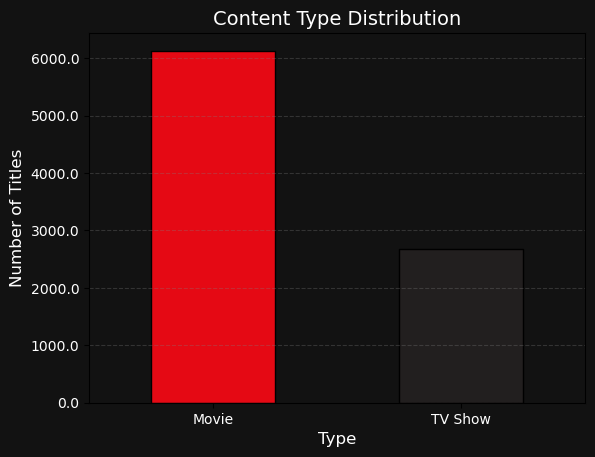

In [4]:
import matplotlib.pyplot as plt

# Calculate the counts of each content type
content_type_counts = data['type'].value_counts()

# Ensure both categories are present (even if one has zero)
content_type_counts = content_type_counts.reindex(['Movie', 'TV Show'], fill_value=0)

# Plot with Netflix-inspired colors
colors = ['#E50914', '#221f1f']  # Netflix red and dark gray
fig, ax = plt.subplots()
content_type_counts.plot(kind='bar', color=colors, edgecolor='black', ax=ax)

# Setting theme
ax.set_title("Content Type Distribution", color='white', fontsize=14)
ax.set_xlabel("Type", color='white', fontsize=12)
ax.set_ylabel("Number of Titles", color='white', fontsize=12)
ax.set_xticklabels(['Movie', 'TV Show'], color='white', rotation=0, fontsize=10)
ax.set_yticklabels(ax.get_yticks(), color='white', fontsize=10)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_facecolor('#121212')
fig.patch.set_facecolor('#121212')

plt.show()


C:\Users\88018\AppData\Local\Temp\ipykernel_22936\1076707239.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), color='white', fontsize=10)


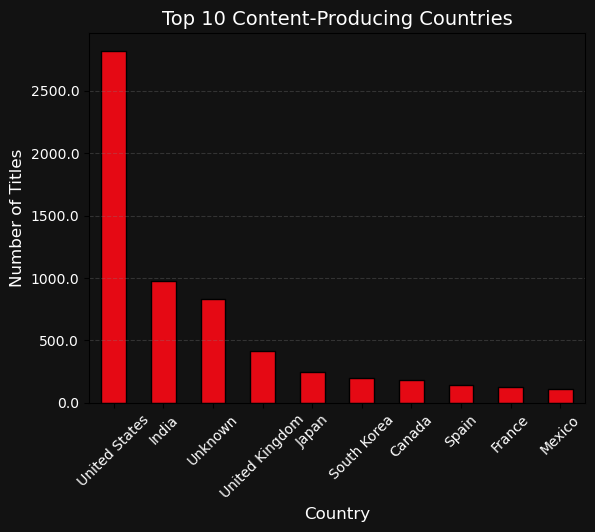

In [5]:
# Count titles by country, then get the top 10
top_countries = data['country'].value_counts().head(10)

# Plotting
fig, ax = plt.subplots()
top_countries.plot(kind='bar', color='#E50914', edgecolor='black', ax=ax)

# Setting theme
ax.set_title("Top 10 Content-Producing Countries", color='white', fontsize=14)
ax.set_xlabel("Country", color='white', fontsize=12)
ax.set_ylabel("Number of Titles", color='white', fontsize=12)
ax.set_xticklabels(top_countries.index, color='white', rotation=45, fontsize=10)
ax.set_yticklabels(ax.get_yticks(), color='white', fontsize=10)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_facecolor('#121212')
fig.patch.set_facecolor('#121212')

plt.show()


C:\Users\88018\AppData\Local\Temp\ipykernel_22936\2131986913.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks().astype(int), color='white', fontsize=10)
C:\Users\88018\AppData\Local\Temp\ipykernel_22936\2131986913.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), color='white', fontsize=10)


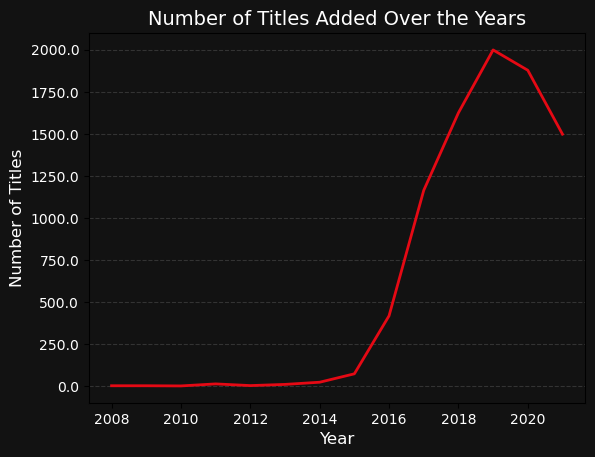

In [9]:
# Convert 'date_added' to datetime to work with years
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

# Extract the year and count titles by each year
data['year_added'] = data['date_added'].dt.year
titles_by_year = data['year_added'].value_counts().sort_index()

# Plotting
fig, ax = plt.subplots()
titles_by_year.plot(kind='line', color='#E50914', linewidth=2, ax=ax)

# Setting theme
ax.set_title("Number of Titles Added Over the Years", color='white', fontsize=14)
ax.set_xlabel("Year", color='white', fontsize=12)
ax.set_ylabel("Number of Titles", color='white', fontsize=12)
ax.set_xticklabels(ax.get_xticks().astype(int), color='white', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), color='white', fontsize=10)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.3)
ax.set_facecolor('#121212')
fig.patch.set_facecolor('#121212')

plt.show()
